In [1]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
from tools_update import state

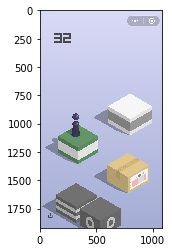

In [5]:
p = plt.imread('./vis_img/l-s.jpg')
plt.imshow(p)
plt.show()

In [2]:
def get_mask(center, size=[60,60], r = 5):
    y,x = np.ogrid[-center[0]:size[0]-center[0], -center[1]:size[1]-center[1]]
    keep = x*x + y*y <= 1
    mask = np.zeros(size) ; mask[keep] = 1 # select a circle of pixels
    mask = gaussian_filter(mask, sigma=r) # blur the circle of pixels. this is a 2D Gaussian for r=r^2=1
    return mask/mask.max()

In [3]:
def perturb_obs(obs, center, size=[60,60,1]):
    perturbed_obs = []
    for i in range(size[2]):
        current_obs = obs[:,:,i]
        mask = get_mask(center)
        A = gaussian_filter(current_obs, 3)
        perturbed_current_obs = current_obs*(1-mask)+mask*A
        perturbed_current_obs = perturbed_current_obs.reshape([60,60,1])
        perturbed_obs.append(perturbed_current_obs)
        
    return perturbed_obs

/Applications/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


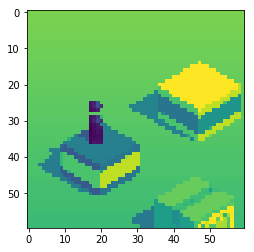

In [8]:
obs = state('./vis_img/l-s.jpg')
plt.imshow(obs[:,:,0])
plt.show()

In [9]:
center = [30,20]
p_obs = perturb_obs(obs, center)

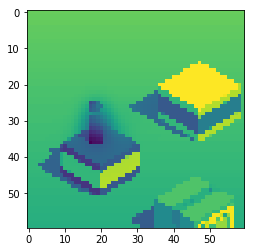

In [10]:
plt.imshow(p_obs[0][:,:,0])
plt.show()

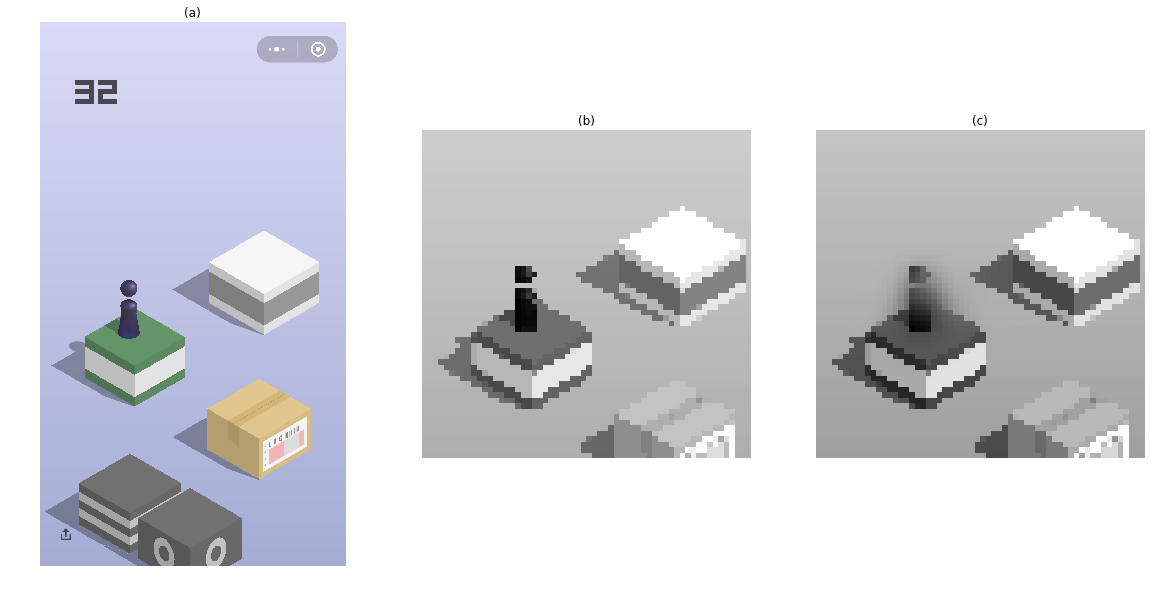

In [22]:
plt.figure(1, figsize=(20,10))
n_columns = 3
n_rows = 1

plt.subplot(n_rows, n_columns, 1)
plt.title('(a)')
plt.imshow(p, interpolation="nearest", cmap="gray")
plt.axis('off')

plt.subplot(n_rows, n_columns, 2)
plt.title('(b)')
plt.imshow(obs[:,:,0], interpolation="nearest", cmap="gray")
plt.axis('off')

plt.subplot(n_rows, n_columns, 3)
plt.title('(c)')
plt.imshow(p_obs[0][:,:,0], interpolation="nearest", cmap="gray")
plt.axis('off')


plt.savefig('pre-per.pdf')
plt.show()

In [4]:
def get_action(sess, agent, obs):
    feed_dict = {agent.obs0: [obs]}
    action = sess.run(agent.actor_tf, feed_dict=feed_dict)
    action = action.flatten()
    return action

In [5]:
import tensorflow as tf    
import os
import cv2

from models_update import Actor, Critic
from memory import Memory
from ddpg import DDPG
from jump_env_update import Jump_Env

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
# hyper-parameters of model
actor_lr = 1e-4
critic_lr = 1e-3
batch_size = 128
gamma = 0
tau = 0.01
nb_actions = 1
limit = int(5000)

In [7]:
#create env
number_templet = [cv2.imread('templet/{}.jpg'.format(i)) for i in range(10)]
restart_templet = cv2.imread('templet/again.jpg')
env = Jump_Env(number_templet=number_templet, restart_templet=restart_templet, threshold = 0.9)

In [22]:
checkpoint = './ddpg-zero-model-envnoise-inputdim4/experiments/checkpoints/model1600'
# checkpoint = './ddpg-zero-model-envnoise-inputdim4/experiments/checkpoints/model2000'
# checkpoint = './ddpg-zero-model-envnoise-inputdim4-from2000-0.5lr/experiments/checkpoints/model12500'
img_size = [60,60]
game_nb = 20
episodes_step = []
episodes_score = []

In [23]:
tf.reset_default_graph()
#create components
actor = Actor(nb_actions, layer_norm=True)
critic = Critic(layer_norm=True)
memory = Memory(limit, action_shape=env.action_shape, observation_shape=env.observation_shape)

setting up target updates ...
len 16 = 16
{ target_actor/Conv/weights:0 } <- { actor/Conv/weights:0 }
{ target_actor/Conv/biases:0 } <- { actor/Conv/biases:0 }
{ target_actor/Conv_1/weights:0 } <- { actor/Conv_1/weights:0 }
{ target_actor/Conv_1/biases:0 } <- { actor/Conv_1/biases:0 }
{ target_actor/Conv_2/weights:0 } <- { actor/Conv_2/weights:0 }
{ target_actor/Conv_2/biases:0 } <- { actor/Conv_2/biases:0 }
{ target_actor/dense/kernel:0 } <- { actor/dense/kernel:0 }
{ target_actor/dense/bias:0 } <- { actor/dense/bias:0 }
{ target_actor/LayerNorm/beta:0 } <- { actor/LayerNorm/beta:0 }
{ target_actor/LayerNorm/gamma:0 } <- { actor/LayerNorm/gamma:0 }
{ target_actor/dense_1/kernel:0 } <- { actor/dense_1/kernel:0 }
{ target_actor/dense_1/bias:0 } <- { actor/dense_1/bias:0 }
{ target_actor/LayerNorm_1/beta:0 } <- { actor/LayerNorm_1/beta:0 }
{ target_actor/LayerNorm_1/gamma:0 } <- { actor/LayerNorm_1/gamma:0 }
{ target_actor/dense_2/kernel:0 } <- { actor/dense_2/kernel:0 }
{ target_actor/d

/Applications/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


step: 1
action: [-0.19947478]
presstime: 780


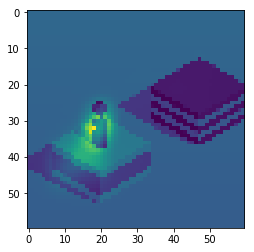

score: 1
-----------------
step: 2
action: [-0.6081065]
presstime: 535


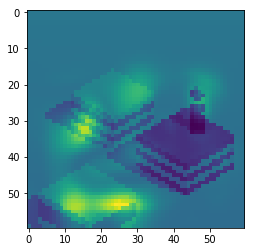

score: 3
-----------------
step: 3
action: [-0.38535434]
presstime: 668


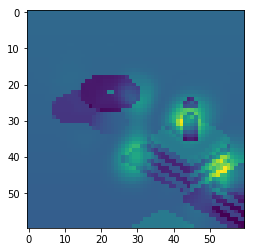

score: 4
-----------------
step: 4
action: [-0.1640501]
presstime: 801


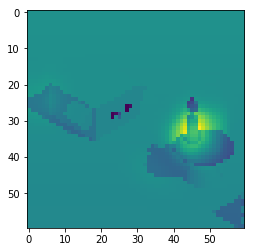

score: 5
-----------------
step: 5
action: [-0.27240822]
presstime: 736


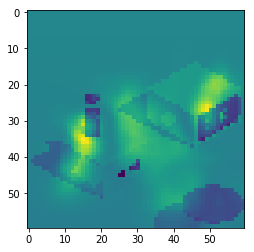

score: 6
-----------------
step: 6
action: [-0.2714972]
presstime: 737


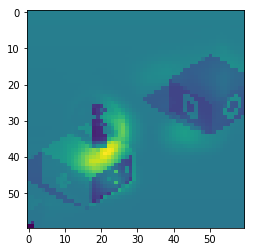

score: 7
-----------------
step: 7
action: [-0.89705676]
presstime: 361


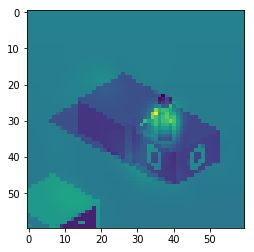

score: 8
-----------------
step: 8
action: [-0.76891035]
presstime: 438


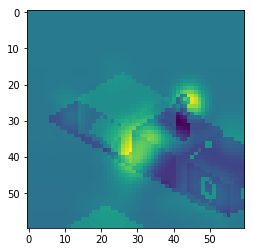

score: 9
-----------------
step: 9
action: [-0.4979406]
presstime: 601


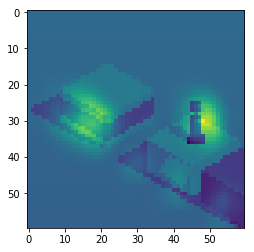

score: 10
-----------------
step: 10
action: [-0.8447618]
presstime: 393


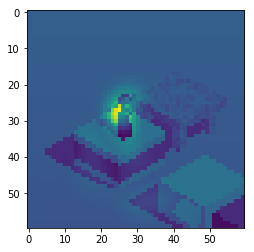

score: 11
-----------------
step: 11
action: [-0.14316916]
presstime: 814


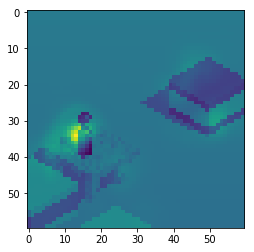

score: 12
-----------------
step: 12
action: [-0.3078182]
presstime: 715


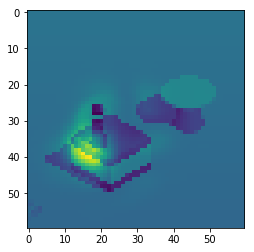

score: 13
-----------------
step: 13
action: [-0.5750289]
presstime: 554


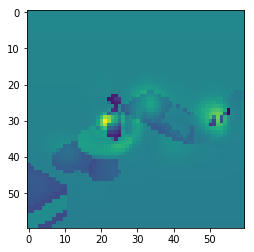

score: 14
-----------------
step: 14
action: [-0.00266453]
presstime: 898


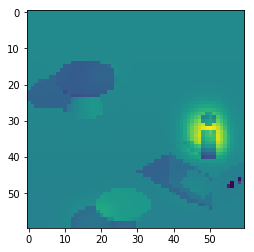

score: 15
-----------------
step: 15
action: [-0.4463113]
presstime: 632


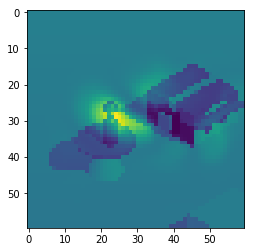

score: 17
-----------------
step: 16
action: [-0.17476618]
presstime: 795


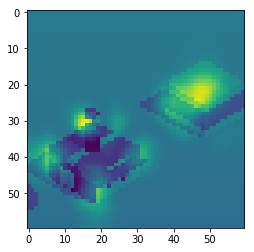

score: 38
-----------------
step: 17
action: [-0.53481674]
presstime: 579


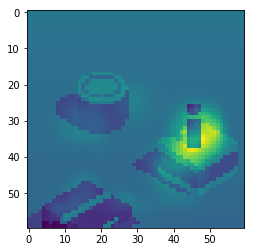

score: 38
-----------------
step: 18
action: [-0.6933284]
presstime: 484


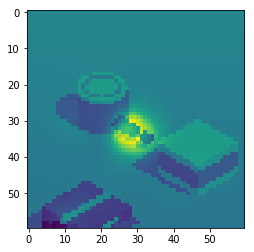

score: None
-----------------
new game
step: 1
action: [-0.6608209]
presstime: 503


KeyboardInterrupt: 

In [24]:
#agent
agent = DDPG(actor, critic, memory, env.observation_shape, env.action_shape,
                 actor_lr=actor_lr, critic_lr=critic_lr, batch_size=batch_size,
                 gamma=gamma, tau=tau)
#saver
saver = tf.train.Saver()
with tf.Session() as sess:
    #load model
    print("Loading model checkpoint {}...\n".format(checkpoint))
    saver.restore(sess, checkpoint)
    agent.sess = sess
        
    #play game
    for i in range(game_nb):
        print('new game')
        obs0 = env.reset()
        episode_step = 0
        episode_score = None
        while 1:
            action = get_action(sess, agent, obs0)
            episode_step += 1
            
            print('step:', episode_step)
            print('action:',action)
            print('presstime:',env.action_to_presstime(action))
            #get saliency
            saliency = np.zeros(img_size)
            for i in range(img_size[0]):
                for j in range(img_size[1]):
                    perturbed_obs0 = perturb_obs(obs0, [i,j])
                    perturbed_action = get_action(sess, agent, perturbed_obs0[0])
                    saliency[i,j] = (perturbed_action - action)**2
            saliency = saliency/np.max(saliency)
            plt.imshow(saliency+obs0[:,:,0])
            plt.show()
            
            #do action
            obs1, reward, done, score = env.step(action)
            print('score:',score)
            print('-----------------')
            #judge death
            if done:
                episodes_step.append(episode_step)
                episodes_score.append(episode_score)
                break
            else:
                obs0 =obs1
                episode_score = score

In [15]:
print(episodes_step)
print('max:', max(episodes_step))
print('min:', min(episodes_step))
print('mean:', sum(episodes_step)/len(episodes_step))

[34, 21, 29, 45, 16, 14, 25, 44, 6, 32, 23, 34, 33, 49, 49, 10, 58]
max: 58
min: 6
mean: 30.705882352941178


In [16]:
print(episodes_score)
print('max:', max(episodes_score))
print('min:', min(episodes_score))
print('mean:', sum(episodes_score)/len(episodes_score))

[85, 64, 60, 106, 58, 52, 55, 100, 9, 113, 24, 88, 106, 174, 118, 19, 161]
max: 174
min: 9
mean: 81.88235294117646


In [17]:
0.9**30

0.04239115827521624

In [18]:
len(episodes_step)

17